# OLS model
### Import knihoven

In [2]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [3]:
file_path = "zkouška/income.xlsx"

In [4]:
df = pd.read_excel(file_path, usecols=['Income', 'Consumption'])

In [5]:
print(df.head())

     Income  Consumption
0  6.968380     6.876368
1  6.962811     6.884384
2  6.978214     6.900630
3  6.997322     6.918102
4  7.004156     6.932545


In [6]:
x = df[['Income']]
y = df[['Consumption']]
x = sm.add_constant(x)

In [7]:
model = sm.OLS(y, x).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:            Consumption   R-squared:                       0.998
Model:                            OLS   Adj. R-squared:                  0.998
Method:                 Least Squares   F-statistic:                 9.482e+04
Date:                Fri, 06 Dec 2024   Prob (F-statistic):          3.80e-226
Time:                        20:24:58   Log-Likelihood:                 445.39
No. Observations:                 164   AIC:                            -886.8
Df Residuals:                     162   BIC:                            -880.6
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.1100      0.025     -4.393      0.0

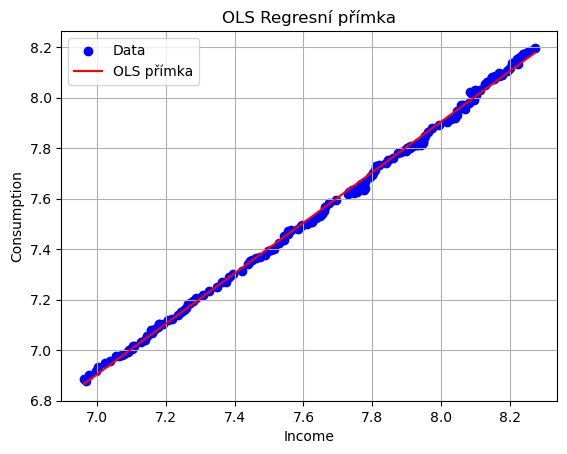

In [8]:
intercept = model.params['const']
slope = model.params['Income']


plt.scatter(df['Income'], df['Consumption'], label='Data', color='blue')
plt.plot(
    df['Income'], 
    intercept + slope * df['Income'], 
    label='OLS přímka', 
    color='red')

plt.xlabel('Income')
plt.ylabel('Consumption')
plt.title('OLS Regresní přímka')
plt.legend()
plt.grid(True)
plt.show()

### Test heteroskedasticity

In [10]:
from statsmodels.stats.diagnostic import het_breuschpagan
residuals = model.resid
bp_test = het_breuschpagan(residuals, x)
print(f"P-hodnota (Breush-Paganův test): {bp_test[1]}")

from statsmodels.stats.diagnostic import het_white
white_test = het_white(residuals, x)
print(f"P-hodnota (Whiteův test): {white_test[1]}")

P-hodnota (Breush-Paganův test): 4.8830930269093486e-05
P-hodnota (Whiteův test): 0.00016525753665814423


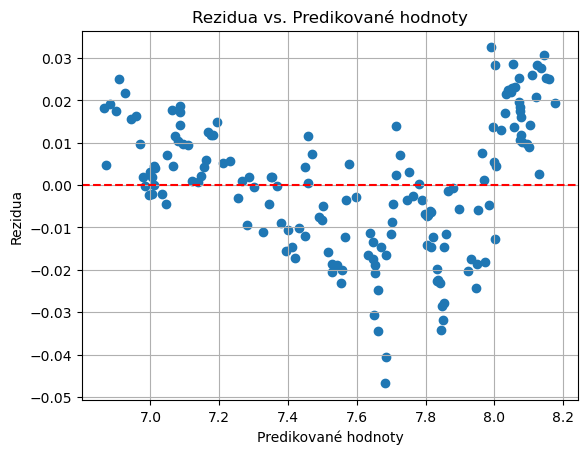

In [11]:
predictions = model.predict(x)

plt.scatter(predictions, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predikované hodnoty')
plt.ylabel('Rezidua')
plt.title('Rezidua vs. Predikované hodnoty')
plt.grid(True)
plt.show()

### Test normality reziduí

In [13]:
from scipy.stats import shapiro

residuals = model.resid

stat, p_value = shapiro(residuals)
print(f"Shapiro-Wilk test statistika: {stat}")
print(f"P-hodnota: {p_value}")


Shapiro-Wilk test statistika: 0.9892664551734924
P-hodnota: 0.2479788213968277


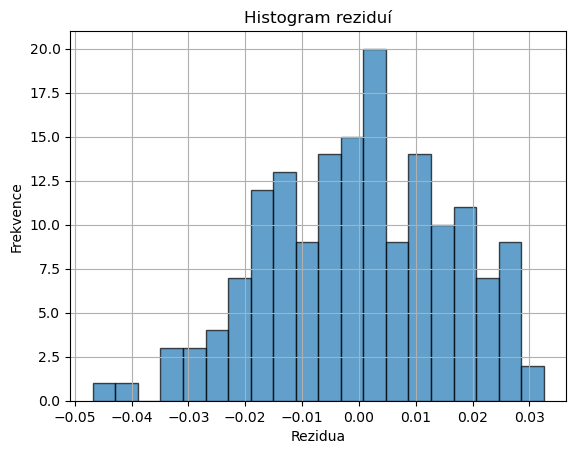

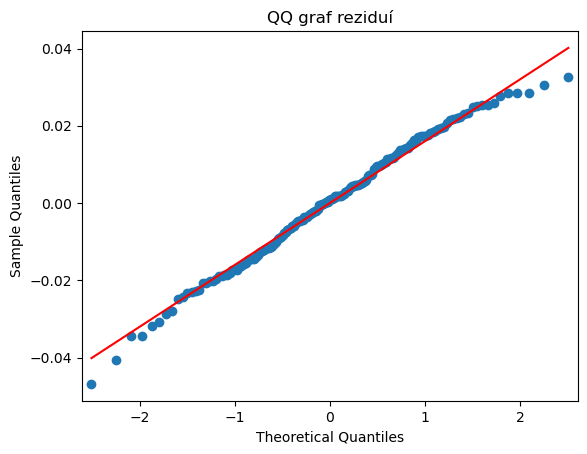

In [26]:
plt.hist(residuals, bins=20, edgecolor='k', alpha=0.7)
plt.title('Histogram reziduí')
plt.xlabel('Rezidua')
plt.ylabel('Frekvence')
plt.grid(True)
plt.show()

sm.qqplot(residuals, line='s')
plt.title('QQ graf reziduí')
plt.show()

### Test autokorelace

In [35]:
from statsmodels.stats.stattools import durbin_watson

dw_stat = durbin_watson(residuals)
print(f"Durbin-Watson statistika: {dw_stat}")

Durbin-Watson statistika: 0.2843131648191217
